In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import scipy.io as sio
import numpy as np
import pandas as pd

github link for the code: https://github.com/vishalpanda10/cse847ml_reconstructingimages.git

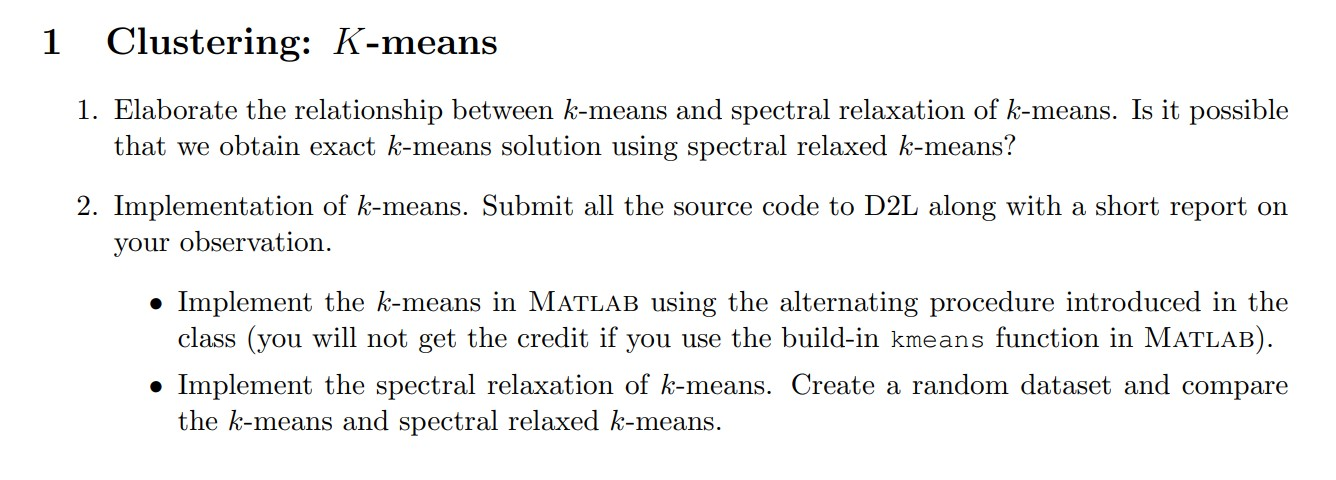

- K-means is a clustering algorithm that aims to partition n number of points to k clusters,each point belongs to the cluster with the nearest mean. The objective is to minimize the sum of squared distances between points and their centroids.
- Spectral relaxation of k-means is a method that attempts to find an approximate solution to the k-means problem by transforming the data into a lower-dimensional space by using eigenvectors of similarity matrix. 
- In some cases the spectral relaxation might give the same solution but that's not the case always.

## K-means

In [188]:
X = np.random.rand(100, 2)

In [211]:
def kmeans(X, k, no_of_iterations):
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :] # Step 1
    distances = cdist(X, centroids, 'euclidean') # Step 2
    points = np.array([np.argmin(i) for i in distances]) # Step 3
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            temp_cent = X[points==idx].mean(axis=0)
            centroids.append(temp_cent)
        centroids = np.vstack(centroids) # Updated Centroids
        distances = cdist(X, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return centroids, points

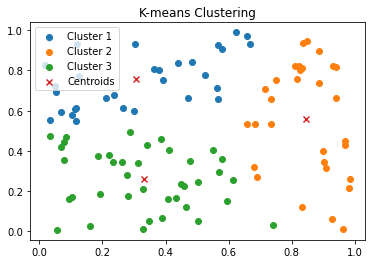

In [212]:
centroids, labels_kmeans = kmeans(X, k=3, no_of_iterations=10)
for i, label in enumerate(np.unique(labels_kmeans)):
    plt.scatter(X[labels_kmeans==label, 0], X[labels_kmeans==label, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', label='Centroids')
plt.title("K-means Clustering")
plt.legend()
plt.show()

## Spectral Relaxation of k means

In [208]:
def spectral_clustering(X, k, sigma, n_clusters):
    dist_matrix = np.exp(-1 * np.sum((X[:, np.newaxis] - X)**2, axis=2) / (2 * sigma**2))
    D = np.diag(np.sum(dist_matrix, axis=1))
    L = D - dist_matrix
    eigvals, eigvecs = np.linalg.eigh(L)
    idx = np.argsort(eigvals)[:k]
    U = eigvecs[:, idx]
    centroids, labels = kmeans(U, n_clusters, 10)
    return labels


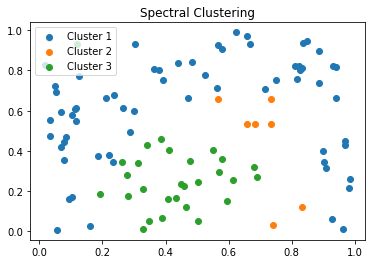

In [209]:
labels_spectral = spectral_clustering(X, k=10, sigma=0.1, n_clusters=3)
for i, label in enumerate(np.unique(labels_spectral)):
    plt.scatter(X[labels_spectral==label, 0], X[labels_spectral==label, 1], label=f'Cluster {i+1}')
plt.legend()
plt.title('Spectral Clustering')
plt.show()

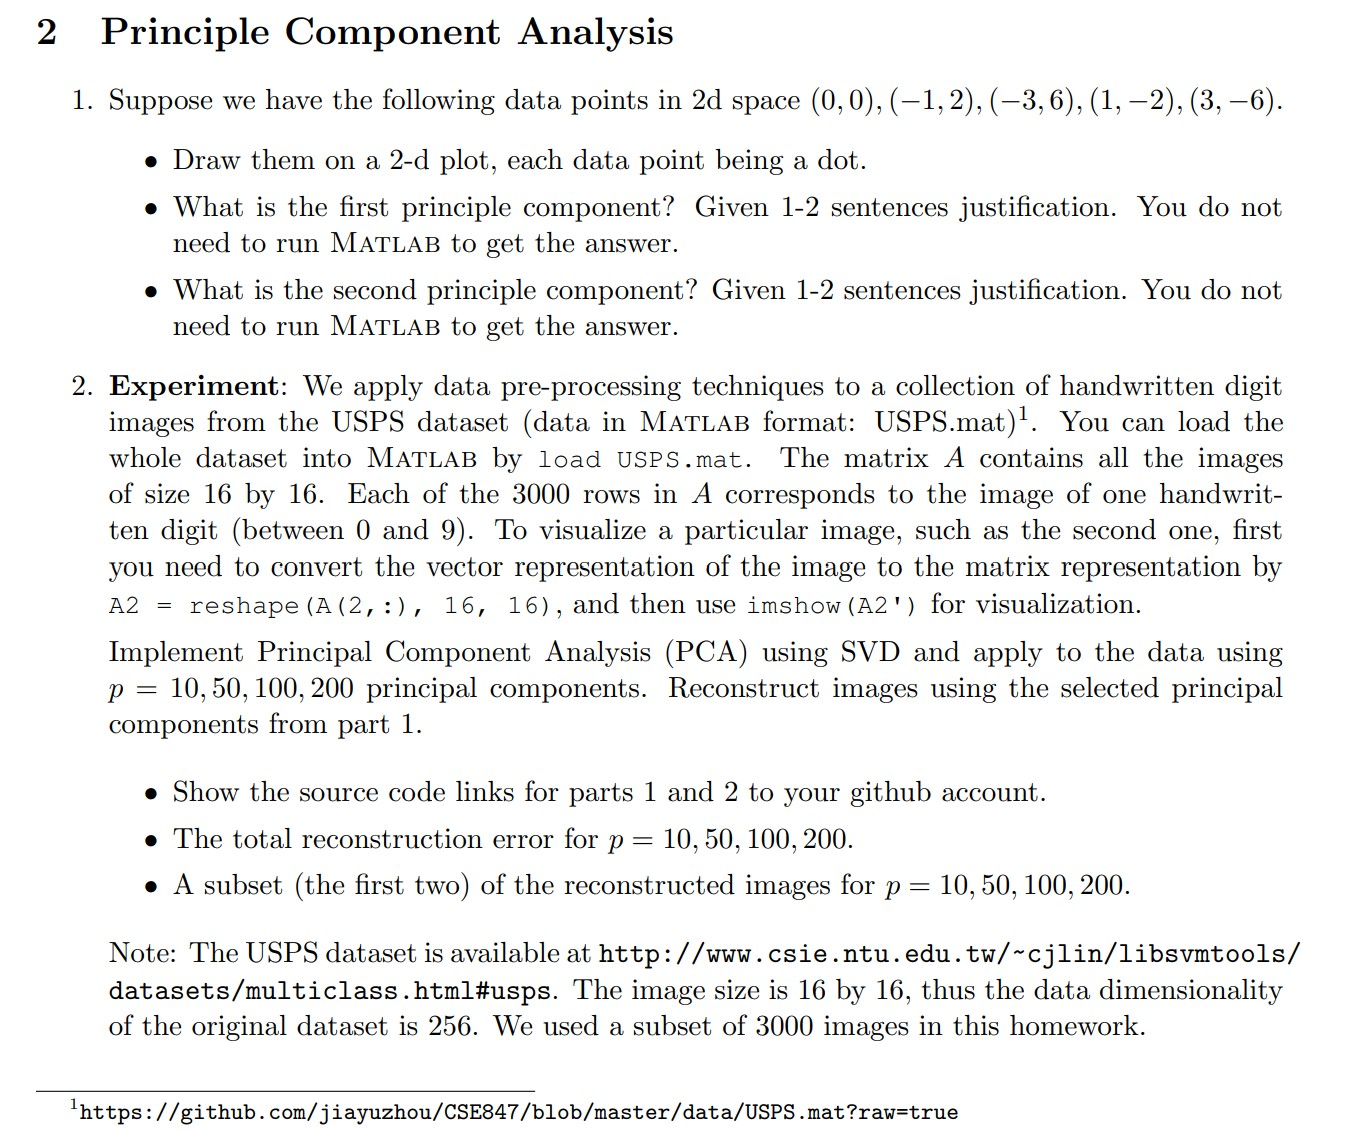

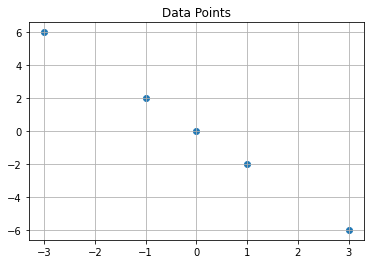

In [21]:
x=np.array([0,-1,-3,1,3])
y=np.array([0,2,6,-2,-6])
plt.scatter(x,y)
plt.title('Data Points')
plt.grid()
plt.show()

- First principal component represents the direction along which the variance of the data is maximized. In this case, PC1 will be in the direction of a straight line passing through the points since the data is in a straight line with negative slope

- Second principal component represents the direction orthogonal to the first principal component, which has the remaining variance in the data. In this case, PC2 will be a line perpendicular to the first principal component, with a positive slope. The variance along this direction will be much smaller compared to the first principal component.

In [22]:
images=sio.loadmat('USPS.mat')

In [36]:
images

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Sep 06 10:31:42 2006',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'L': array([[0],
        [0],
        [0],
        ...,
        [9],
        [9],
        [9]], dtype=uint8)}

In [37]:
A=images['A']
L=images['L']

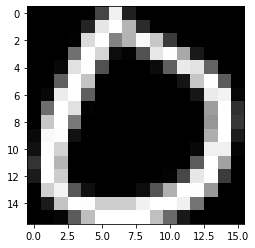

In [110]:
plt.imshow(A[0].reshape(16,16),cmap='gray')

In [97]:
components=[10, 50, 100, 200]
recon_images=[]
for i in components:
    xc = A - A.mean(axis=0)
    u,s,vt = np.linalg.svd(xc, full_matrices=False)
    recon = (u[:,:i] * s[:i]) @ vt[:i,:] + xc.mean(axis=0)
    recon_images.append(recon)

In [98]:
#Reconstruction error
errors= [np.linalg.norm(A - i) for i in recon_images]
for i, error in zip(components, errors):
    print(f"Total reconstruction error for p = {i}: {error:.2f}")

Total reconstruction error for p = 10: 672.50
Total reconstruction error for p = 50: 581.32
Total reconstruction error for p = 100: 557.85
Total reconstruction error for p = 200: 546.15


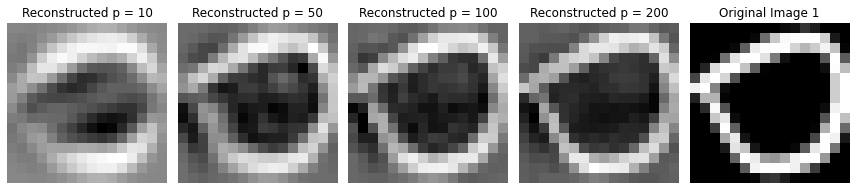

In [106]:
# Original and reconstructed images for the first data point
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 3))
plt.imshow(A[0].reshape(16, 16).T, cmap='gray')
plt.title("Original Image 1")
plt.axis('off')
plt.subplot(1, 5, 1)

for j, i in enumerate(components):
    plt.imshow(recon_images[j][0].reshape(16, 16).T, cmap='gray')
    plt.title(f"Reconstructed p = {i}")
    plt.axis('off')
    plt.subplot(1, 5, j + 2)
plt.tight_layout()
plt.show()

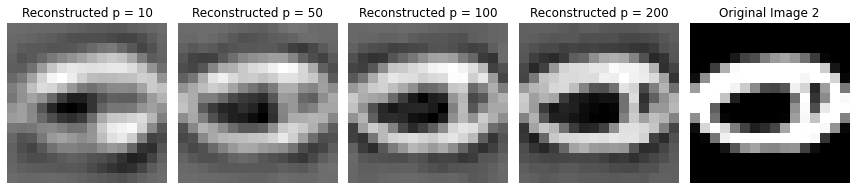

In [109]:
# Original and reconstructed images for the second data point
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 3))
plt.imshow(A[1].reshape(16, 16).T, cmap='gray')
plt.title("Original Image 2")
plt.axis('off')
plt.subplot(1, 5, 1)
for j, i in enumerate(components):
    plt.imshow(recon_images[j][1].reshape(16, 16).T, cmap='gray')
    plt.title(f"Reconstructed p = {i}")
    plt.axis('off')
    plt.subplot(1, 5, j + 2)
plt.tight_layout()
plt.show()